In [1]:
import torch
import torch.optim as optim
from model import Net
from torchsummary import summary
from torchvision import transforms
from utils import Trainer, build_mnist, evaluate_model, plot_history, plot_sampledata

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.RandomApply(
            [
                transforms.CenterCrop(22),
            ],
            p=0.1,
        ),
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

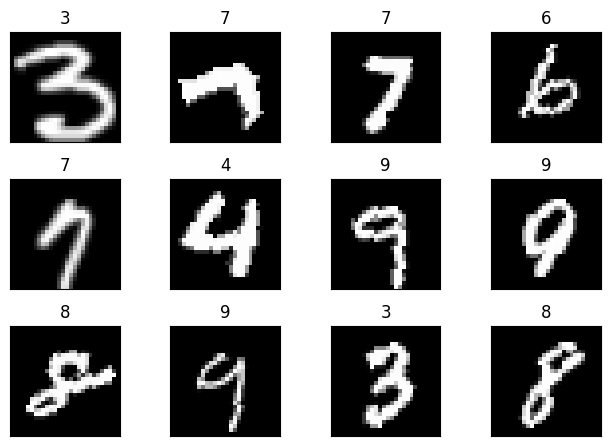

In [5]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
       BatchNorm2d-2          [-1, 128, 28, 28]             256
         Dropout2d-3          [-1, 128, 28, 28]               0
            Conv2d-4            [-1, 4, 30, 30]             516
            Conv2d-5           [-1, 16, 30, 30]             592
       BatchNorm2d-6           [-1, 16, 30, 30]              32
         Dropout2d-7           [-1, 16, 30, 30]               0
         MaxPool2d-8           [-1, 16, 15, 15]               0
            Conv2d-9           [-1, 16, 15, 15]           2,320
      BatchNorm2d-10           [-1, 16, 15, 15]              32
        Dropout2d-11           [-1, 16, 15, 15]               0
           Conv2d-12           [-1, 32, 15, 15]           4,640
      BatchNorm2d-13           [-1, 32, 15, 15]              64
        Dropout2d-14           [-1, 32,

In [7]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.08, momentum=0.9)
num_epochs = 20

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)


Epoch 1


Train: Loss=0.2730 Batch_id=117 Accuracy=67.36: 100%|██████████| 118/118 [00:28<00:00,  4.11it/s]


Test set: Average loss: 0.1383, Accuracy: 9565/10000 (95.65%)

Epoch 2


Train: Loss=0.1362 Batch_id=117 Accuracy=93.81: 100%|██████████| 118/118 [00:25<00:00,  4.68it/s]


Test set: Average loss: 0.0780, Accuracy: 9749/10000 (97.49%)

Epoch 3


Train: Loss=0.0551 Batch_id=117 Accuracy=95.87: 100%|██████████| 118/118 [00:24<00:00,  4.74it/s]


Test set: Average loss: 0.0406, Accuracy: 9879/10000 (98.79%)

Epoch 4


Train: Loss=0.1067 Batch_id=117 Accuracy=96.71: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]


Test set: Average loss: 0.0440, Accuracy: 9866/10000 (98.66%)

Epoch 5


Train: Loss=0.1017 Batch_id=117 Accuracy=96.96: 100%|██████████| 118/118 [00:23<00:00,  5.00it/s]


Test set: Average loss: 0.0320, Accuracy: 9903/10000 (99.03%)

Epoch 6


Train: Loss=0.1841 Batch_id=117 Accuracy=97.24: 100%|██████████| 118/118 [00:23<00:00,  5.05it/s]


Test set: Average loss: 0.0293, Accuracy: 9908/10000 (99.08%)

Epoch 7


Train: Loss=0.0283 Batch_id=117 Accuracy=97.61: 100%|██████████| 118/118 [00:23<00:00,  4.94it/s]


Test set: Average loss: 0.0306, Accuracy: 9901/10000 (99.01%)

Epoch 8


Train: Loss=0.0380 Batch_id=117 Accuracy=97.68: 100%|██████████| 118/118 [00:24<00:00,  4.85it/s]


Test set: Average loss: 0.0253, Accuracy: 9923/10000 (99.23%)

Epoch 9


Train: Loss=0.0727 Batch_id=117 Accuracy=97.89: 100%|██████████| 118/118 [00:26<00:00,  4.48it/s]


Test set: Average loss: 0.0261, Accuracy: 9921/10000 (99.21%)

Epoch 10


Train: Loss=0.0350 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:24<00:00,  4.84it/s]


Test set: Average loss: 0.0253, Accuracy: 9926/10000 (99.26%)

Epoch 11


Train: Loss=0.0831 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:24<00:00,  4.76it/s]


Test set: Average loss: 0.0240, Accuracy: 9916/10000 (99.16%)

Epoch 12


Train: Loss=0.0312 Batch_id=117 Accuracy=98.08: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0239, Accuracy: 9922/10000 (99.22%)

Epoch 13


Train: Loss=0.1392 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [00:23<00:00,  5.04it/s]


Test set: Average loss: 0.0239, Accuracy: 9920/10000 (99.20%)

Epoch 14


Train: Loss=0.0329 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [00:24<00:00,  4.79it/s]


Test set: Average loss: 0.0220, Accuracy: 9931/10000 (99.31%)

Epoch 15


Train: Loss=0.0276 Batch_id=117 Accuracy=98.20: 100%|██████████| 118/118 [00:25<00:00,  4.72it/s]


Test set: Average loss: 0.0215, Accuracy: 9927/10000 (99.27%)

Epoch 16


Train: Loss=0.0577 Batch_id=117 Accuracy=98.21: 100%|██████████| 118/118 [00:25<00:00,  4.70it/s]


Test set: Average loss: 0.0205, Accuracy: 9935/10000 (99.35%)

Epoch 17


Train: Loss=0.0644 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:25<00:00,  4.71it/s]


Test set: Average loss: 0.0179, Accuracy: 9934/10000 (99.34%)

Epoch 18


Train: Loss=0.0356 Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [00:26<00:00,  4.41it/s]


Test set: Average loss: 0.0198, Accuracy: 9938/10000 (99.38%)

Epoch 19


Train: Loss=0.1223 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:25<00:00,  4.70it/s]


Test set: Average loss: 0.0181, Accuracy: 9938/10000 (99.38%)

Epoch 20


Train: Loss=0.0282 Batch_id=117 Accuracy=98.38: 100%|██████████| 118/118 [00:24<00:00,  4.88it/s]


Test set: Average loss: 0.0182, Accuracy: 9943/10000 (99.43%)



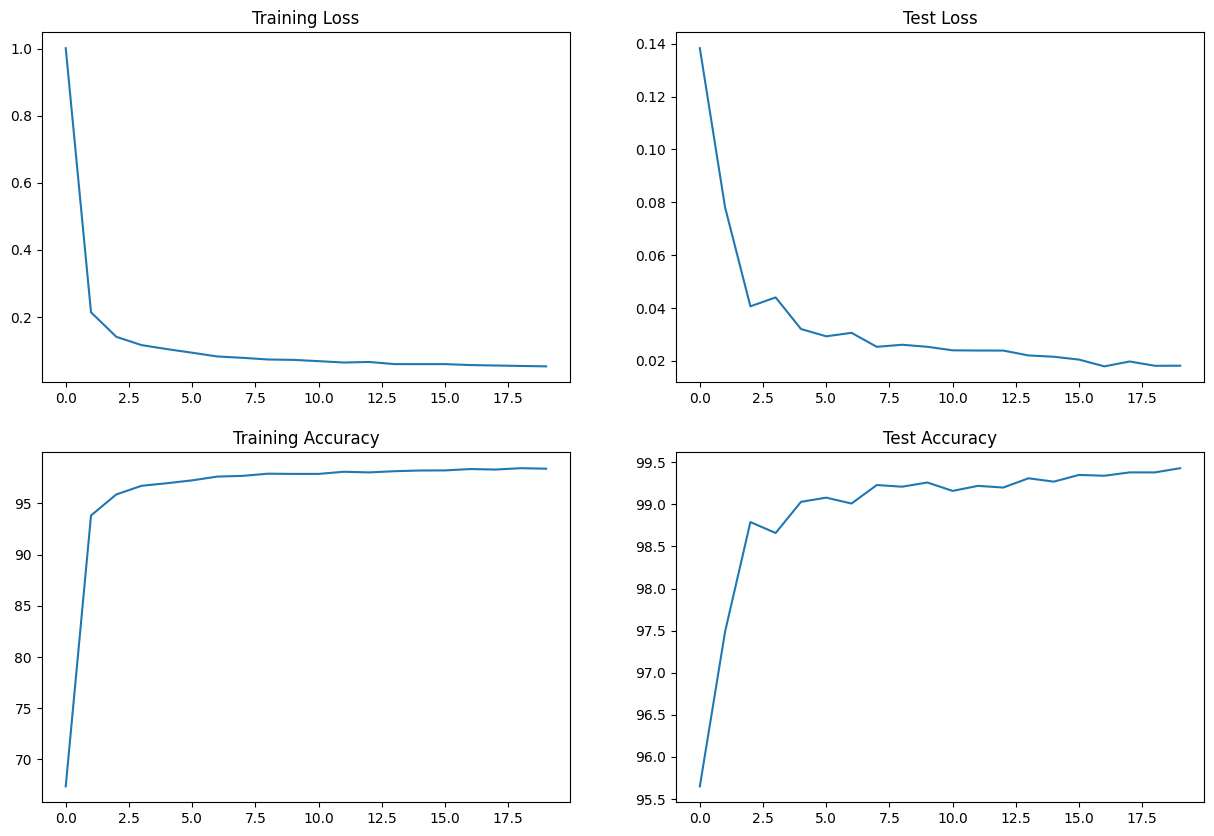

In [8]:
plot_history(trainer.train_losses, trainer.train_acc, trainer.test_losses, trainer.test_acc)

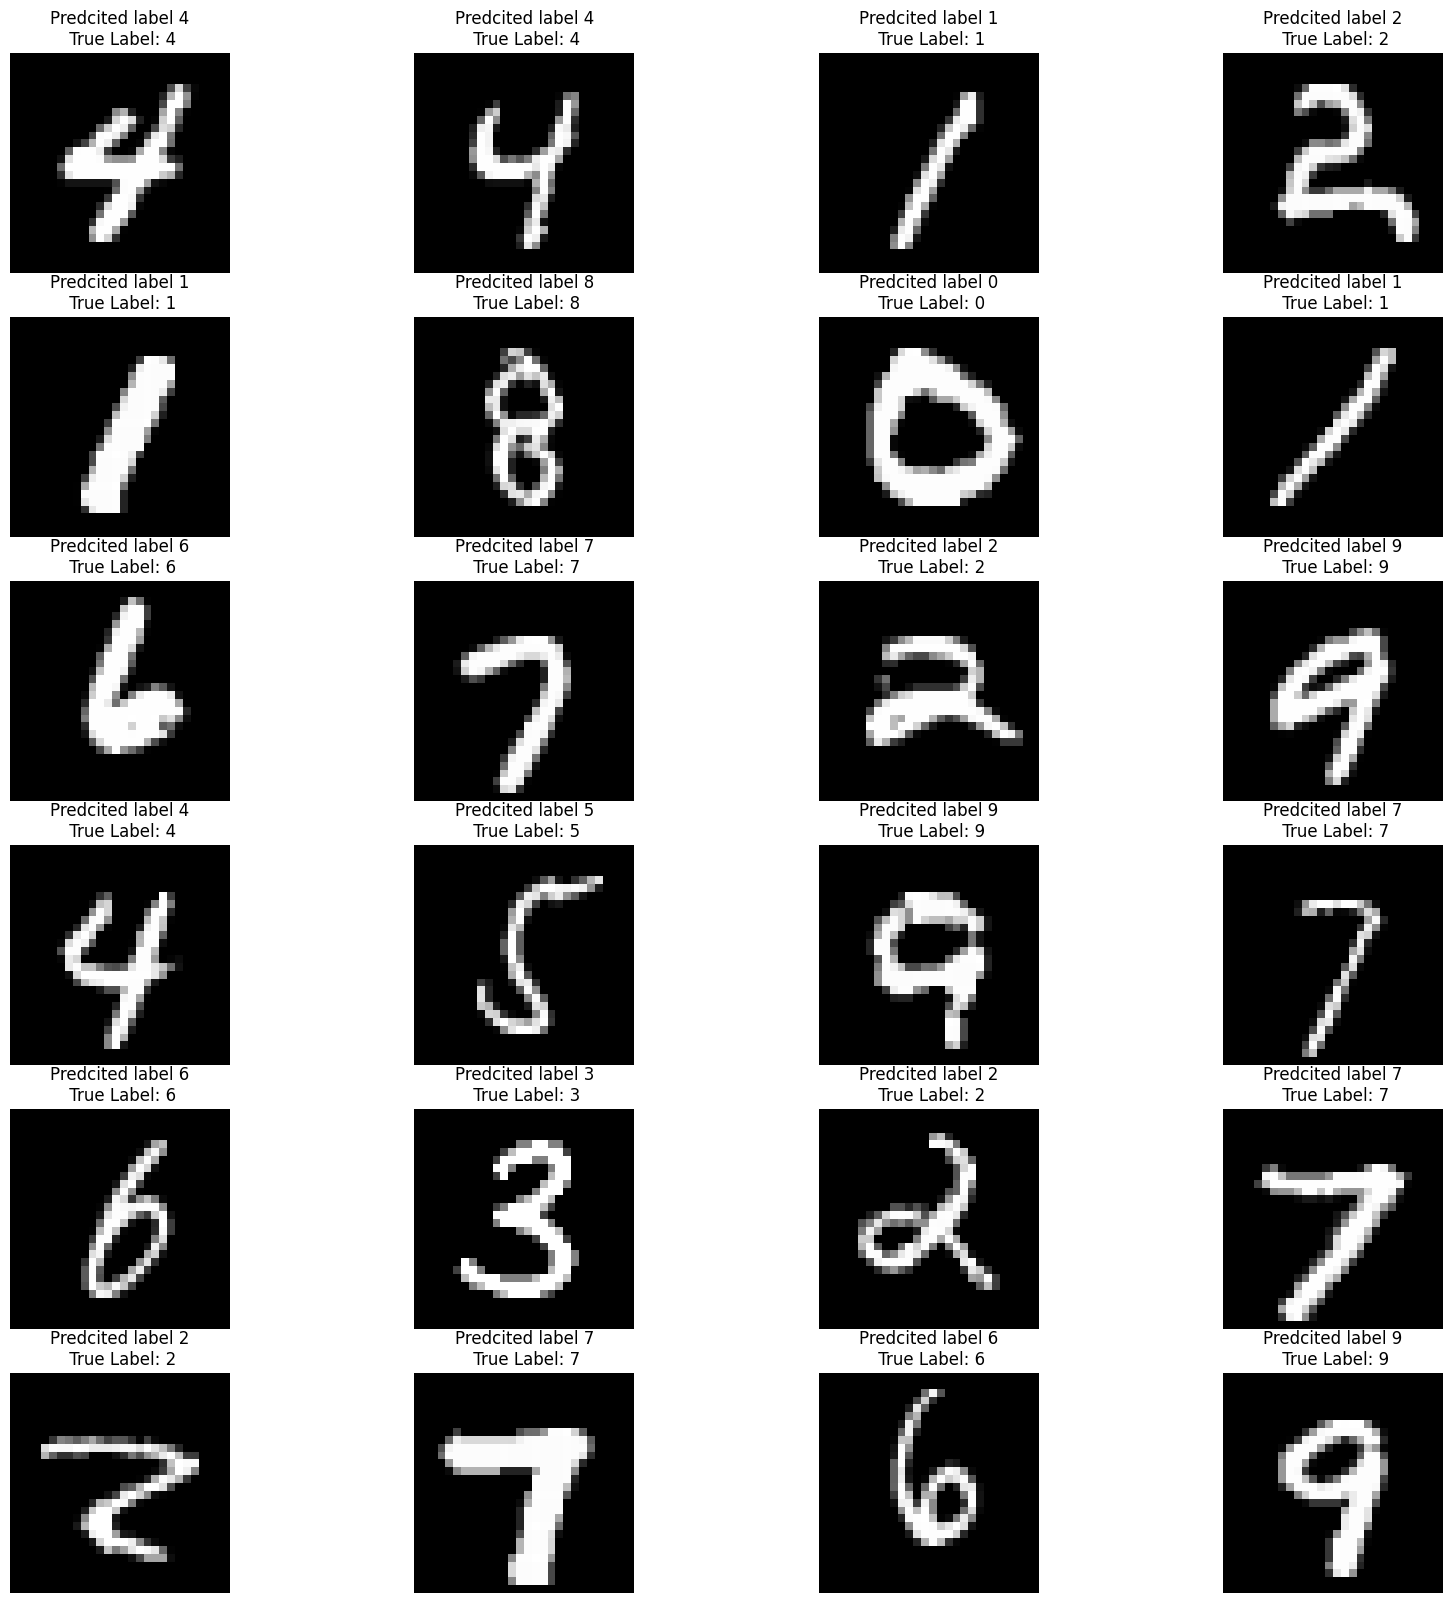

In [9]:
evaluate_model(trainer.model, test_loader, device)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
